<a href="https://colab.research.google.com/github/mbenko908/mbenko908/blob/main/Klasifikacia_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models

2.7.0


11501568/11490434 [==============================] - 0s 0us/step


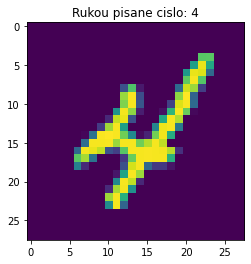

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
image = 9

plt.imshow(train_images[image])
plt.title('Rukou pisane cislo: ' +str(train_labels[image]))
plt.show()

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
len(test_images)

10000

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = tf.keras.utils.normalize(train_images, axis=1)

test_images = test_images.reshape((10000, 28 * 28))
test_images = tf.keras.utils.normalize(test_images, axis=1)

In [ ]:
test_images[0].shape

(784,)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28 * 28, )))
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x=train_images, y=train_labels, epochs=5, batch_size=100)
history

Epoch 1/5
600/600 [==============================] - 9s 15ms/step - loss: 0.3644 - acc: 0.9025
Epoch 2/5
600/600 [==============================] - 9s 15ms/step - loss: 0.1666 - acc: 0.9512
Epoch 3/5
600/600 [==============================] - 9s 15ms/step - loss: 0.1148 - acc: 0.9664
Epoch 4/5
600/600 [==============================] - 9s 15ms/step - loss: 0.0861 - acc: 0.9751
Epoch 5/5
600/600 [==============================] - 9s 15ms/step - loss: 0.0682 - acc: 0.9796


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Presnost test:', test_acc*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.0815 - acc: 0.9763
Presnost test: 97.63000011444092


In [ ]:
image = 5

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[image])

1

In [ ]:
test_images.shape

(10000, 784)

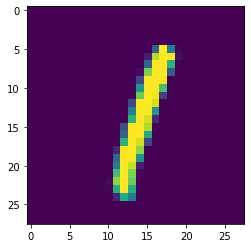

In [ ]:
plt.imshow(np.resize(test_images[image], (28, 28)))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


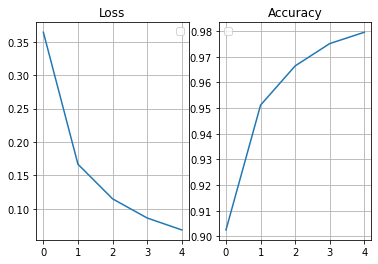

In [ ]:
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'])
plt.grid()
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.grid()
plt.legend()
plt.show()

In [ ]:
test_labels.shape, predictions.shape
#confusion_matrix =  tf.math.confusion_matrix(labels=test_labels, predcitions=predictions)

((10000,), (10000, 10))

In [ ]:
test_labels[3], np.argmax(predictions[3])

(0, 0)

In [ ]:
#confusion_matrix =  tf.math.confusion_matrix(test_labels, predictions[:, 0])
from sklearn.metrics import confusion_matrix

predicted = []
for i in predictions:
  predicted = np.append(predicted, np.argmax(i))

In [ ]:
predicted.astype(int)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
confusion_matrix(test_labels, predicted)

array([[ 971,    0,    1,    3,    0,    1,    2,    1,    1,    0],
       [   0, 1123,    4,    1,    0,    1,    2,    1,    3,    0],
       [   5,    0, 1012,    2,    2,    1,    2,    5,    3,    0],
       [   0,    0,    9,  993,    0,    0,    0,    3,    3,    2],
       [   2,    0,    4,    0,  964,    0,    3,    2,    1,    6],
       [   2,    0,    0,   13,    1,  869,    4,    0,    2,    1],
       [   6,    3,    2,    1,    2,    3,  938,    0,    3,    0],
       [   1,    5,   11,    9,    0,    1,    0,  998,    0,    3],
       [   3,    0,    7,   12,    3,    3,    2,    5,  936,    3],
       [   4,    5,    1,   14,   15,    3,    1,    5,    2,  959]])

In [ ]:
confusion_matrix2 =  tf.math.confusion_matrix(test_labels, predicted, name='Confusion Matrix')
confusion_matrix2


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    3,    0,    1,    2,    1,    1,    0],
       [   0, 1123,    4,    1,    0,    1,    2,    1,    3,    0],
       [   5,    0, 1012,    2,    2,    1,    2,    5,    3,    0],
       [   0,    0,    9,  993,    0,    0,    0,    3,    3,    2],
       [   2,    0,    4,    0,  964,    0,    3,    2,    1,    6],
       [   2,    0,    0,   13,    1,  869,    4,    0,    2,    1],
       [   6,    3,    2,    1,    2,    3,  938,    0,    3,    0],
       [   1,    5,   11,    9,    0,    1,    0,  998,    0,    3],
       [   3,    0,    7,   12,    3,    3,    2,    5,  936,    3],
       [   4,    5,    1,   14,   15,    3,    1,    5,    2,  959]],
      dtype=int32)>

In [ ]:
model.save('models/model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('models/model.h5')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc =  loaded_model.evaluate(test_images, test_labels)
print("Loaded model accuracy: {:5.2f}%".format(100*test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0815 - acc: 0.9763
Loaded model accuracy: 97.63%


In [ ]:
new_predictions = loaded_model.predict(test_images)

In [ ]:
np.argmax(new_predictions[0]), test_labels[0]

(7, 7)